# Part 1 - Drug Efficacy Heterogeneity Study using Coefficients of PK/PD

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 11:38:48 2020

@author: harshparikh
"""
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns

def set_ds(data,col_y,max_depth=2):
    data_prime = data.copy(deep=True)
    data_prime = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders',col_y]].dropna()
    Y = data_prime[col_y]
    X = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders']]
    model = tree.DecisionTreeRegressor(max_depth=max_depth,min_samples_split=10,min_samples_leaf=8).fit(X,Y)
    print(model.score(X,Y))
    return X,Y,model

In [2]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv',index_col=0)
data.head()

,cluster,alpha0,alpha[1],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],sigma_err,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
SID,,,,,,,,,,,,,,,,,,,,,
sid2,5,0.311404,0.243438,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,7.0,0.0,1.0,2.0,4.0,3.0,1.0,3.0,0.0,1.0
sid8,5,1.211867,0.170145,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,12.0,0.0,4.0,2.0,6.0,11.0,0.0,12.0,1.0,0.0
sid13,5,0.669065,0.228883,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,10.0,0.0,4.0,1.0,5.0,3.0,1.0,10.0,1.0,0.0
sid17,5,-0.645282,0.381436,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,8.0,0.0,1.0,2.0,5.0,8.0,0.0,8.0,0.0,0.0
sid18,4,2.849906,0.145905,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.583988,...,4.0,1.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,0.0
sid30,1,1.385606,0.197411,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,5.585689,...,15.0,0.0,4.0,5.0,6.0,14.0,0.0,15.0,1.0,0.0
sid39,1,-1.260976,0.186079,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,5.585689,...,9.0,0.0,4.0,1.0,4.0,9.0,0.0,9.0,1.0,0.0
sid54,2,-0.391230,0.235239,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,3.678595,...,15.0,0.0,4.0,5.0,6.0,13.0,0.0,15.0,0.0,0.0
sid56,5,-0.554278,0.281500,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,12.0,0.0,4.0,3.0,5.0,3.0,1.0,12.0,1.0,0.0


In [3]:
col_y = 'alpha0'
X,Y,model = set_ds(data,col_y,max_depth=3)

0.11900694678182511


In [4]:
X.columns

Index(['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGC

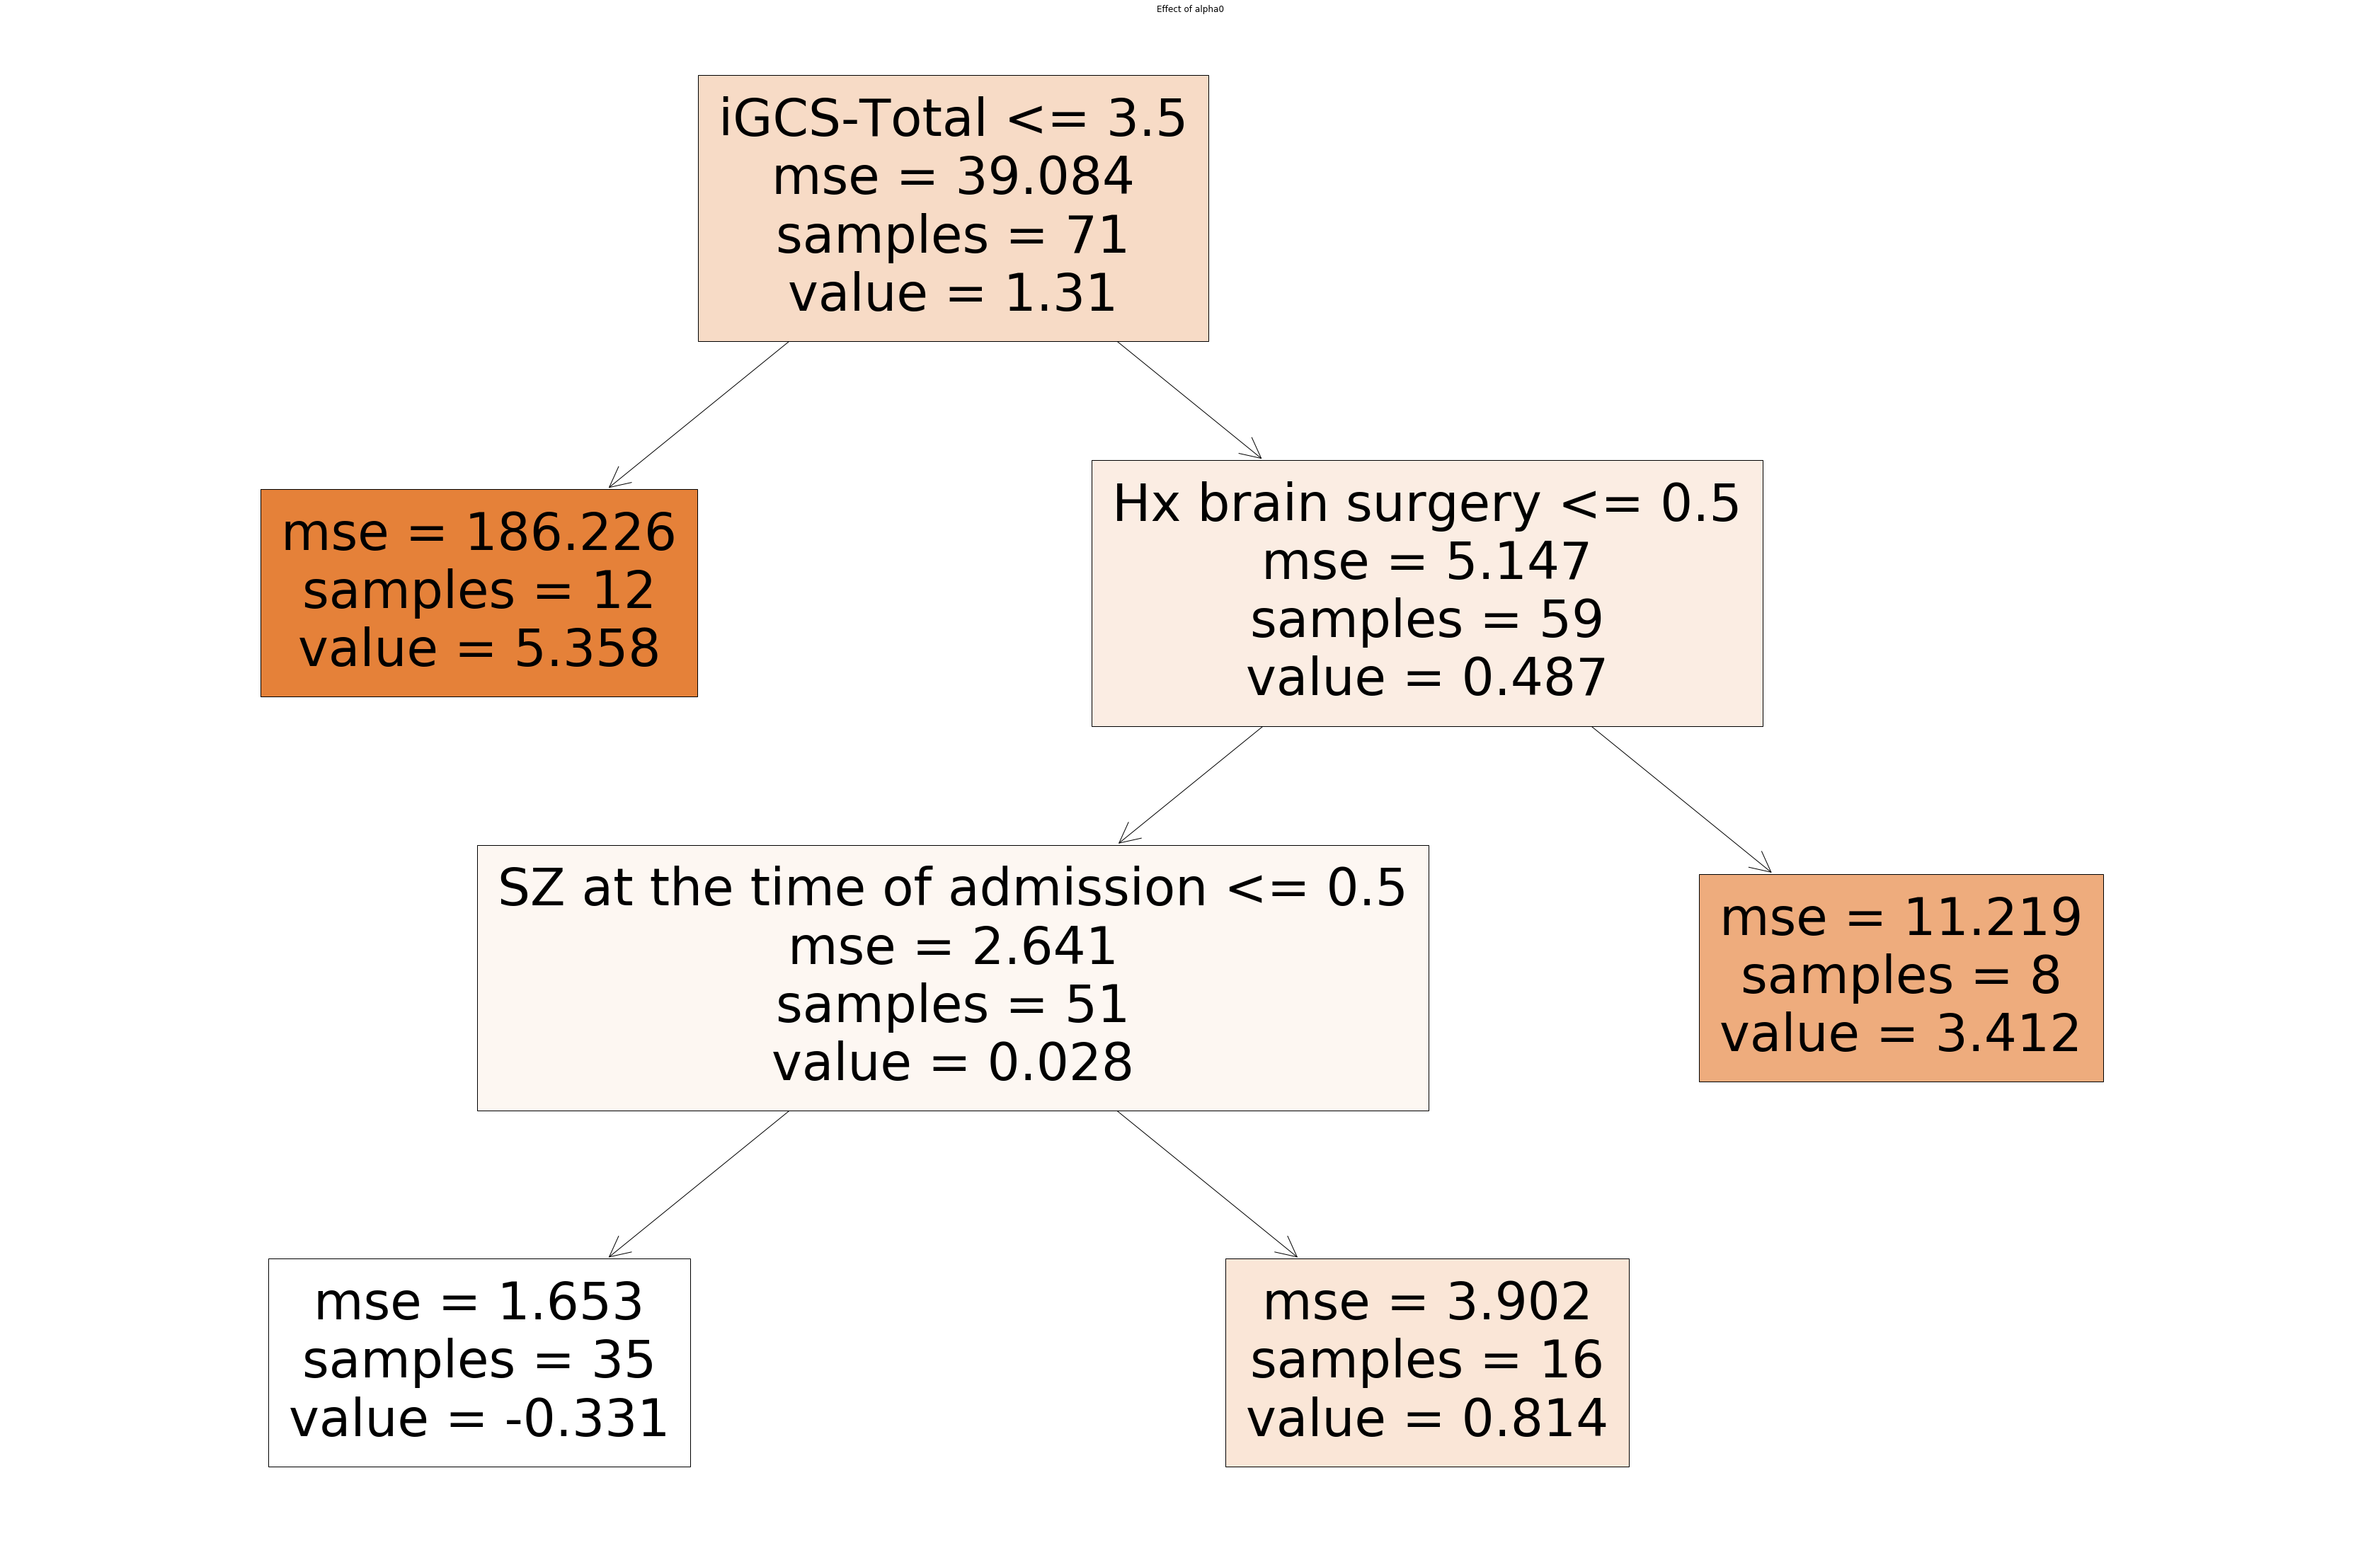

In [6]:
fig,ax = plt.subplots(figsize=(60,40))
tree.plot_tree(model,ax=ax,
               feature_names=['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at the time of admission',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
       'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
       'Worst GCS Intubation status', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders'],filled = True)
plt.title('Effect of %s'%(col_y))
fig.savefig('importance_tree_%s.png'%(col_y))

In [50]:
X.shape

(71, 36)

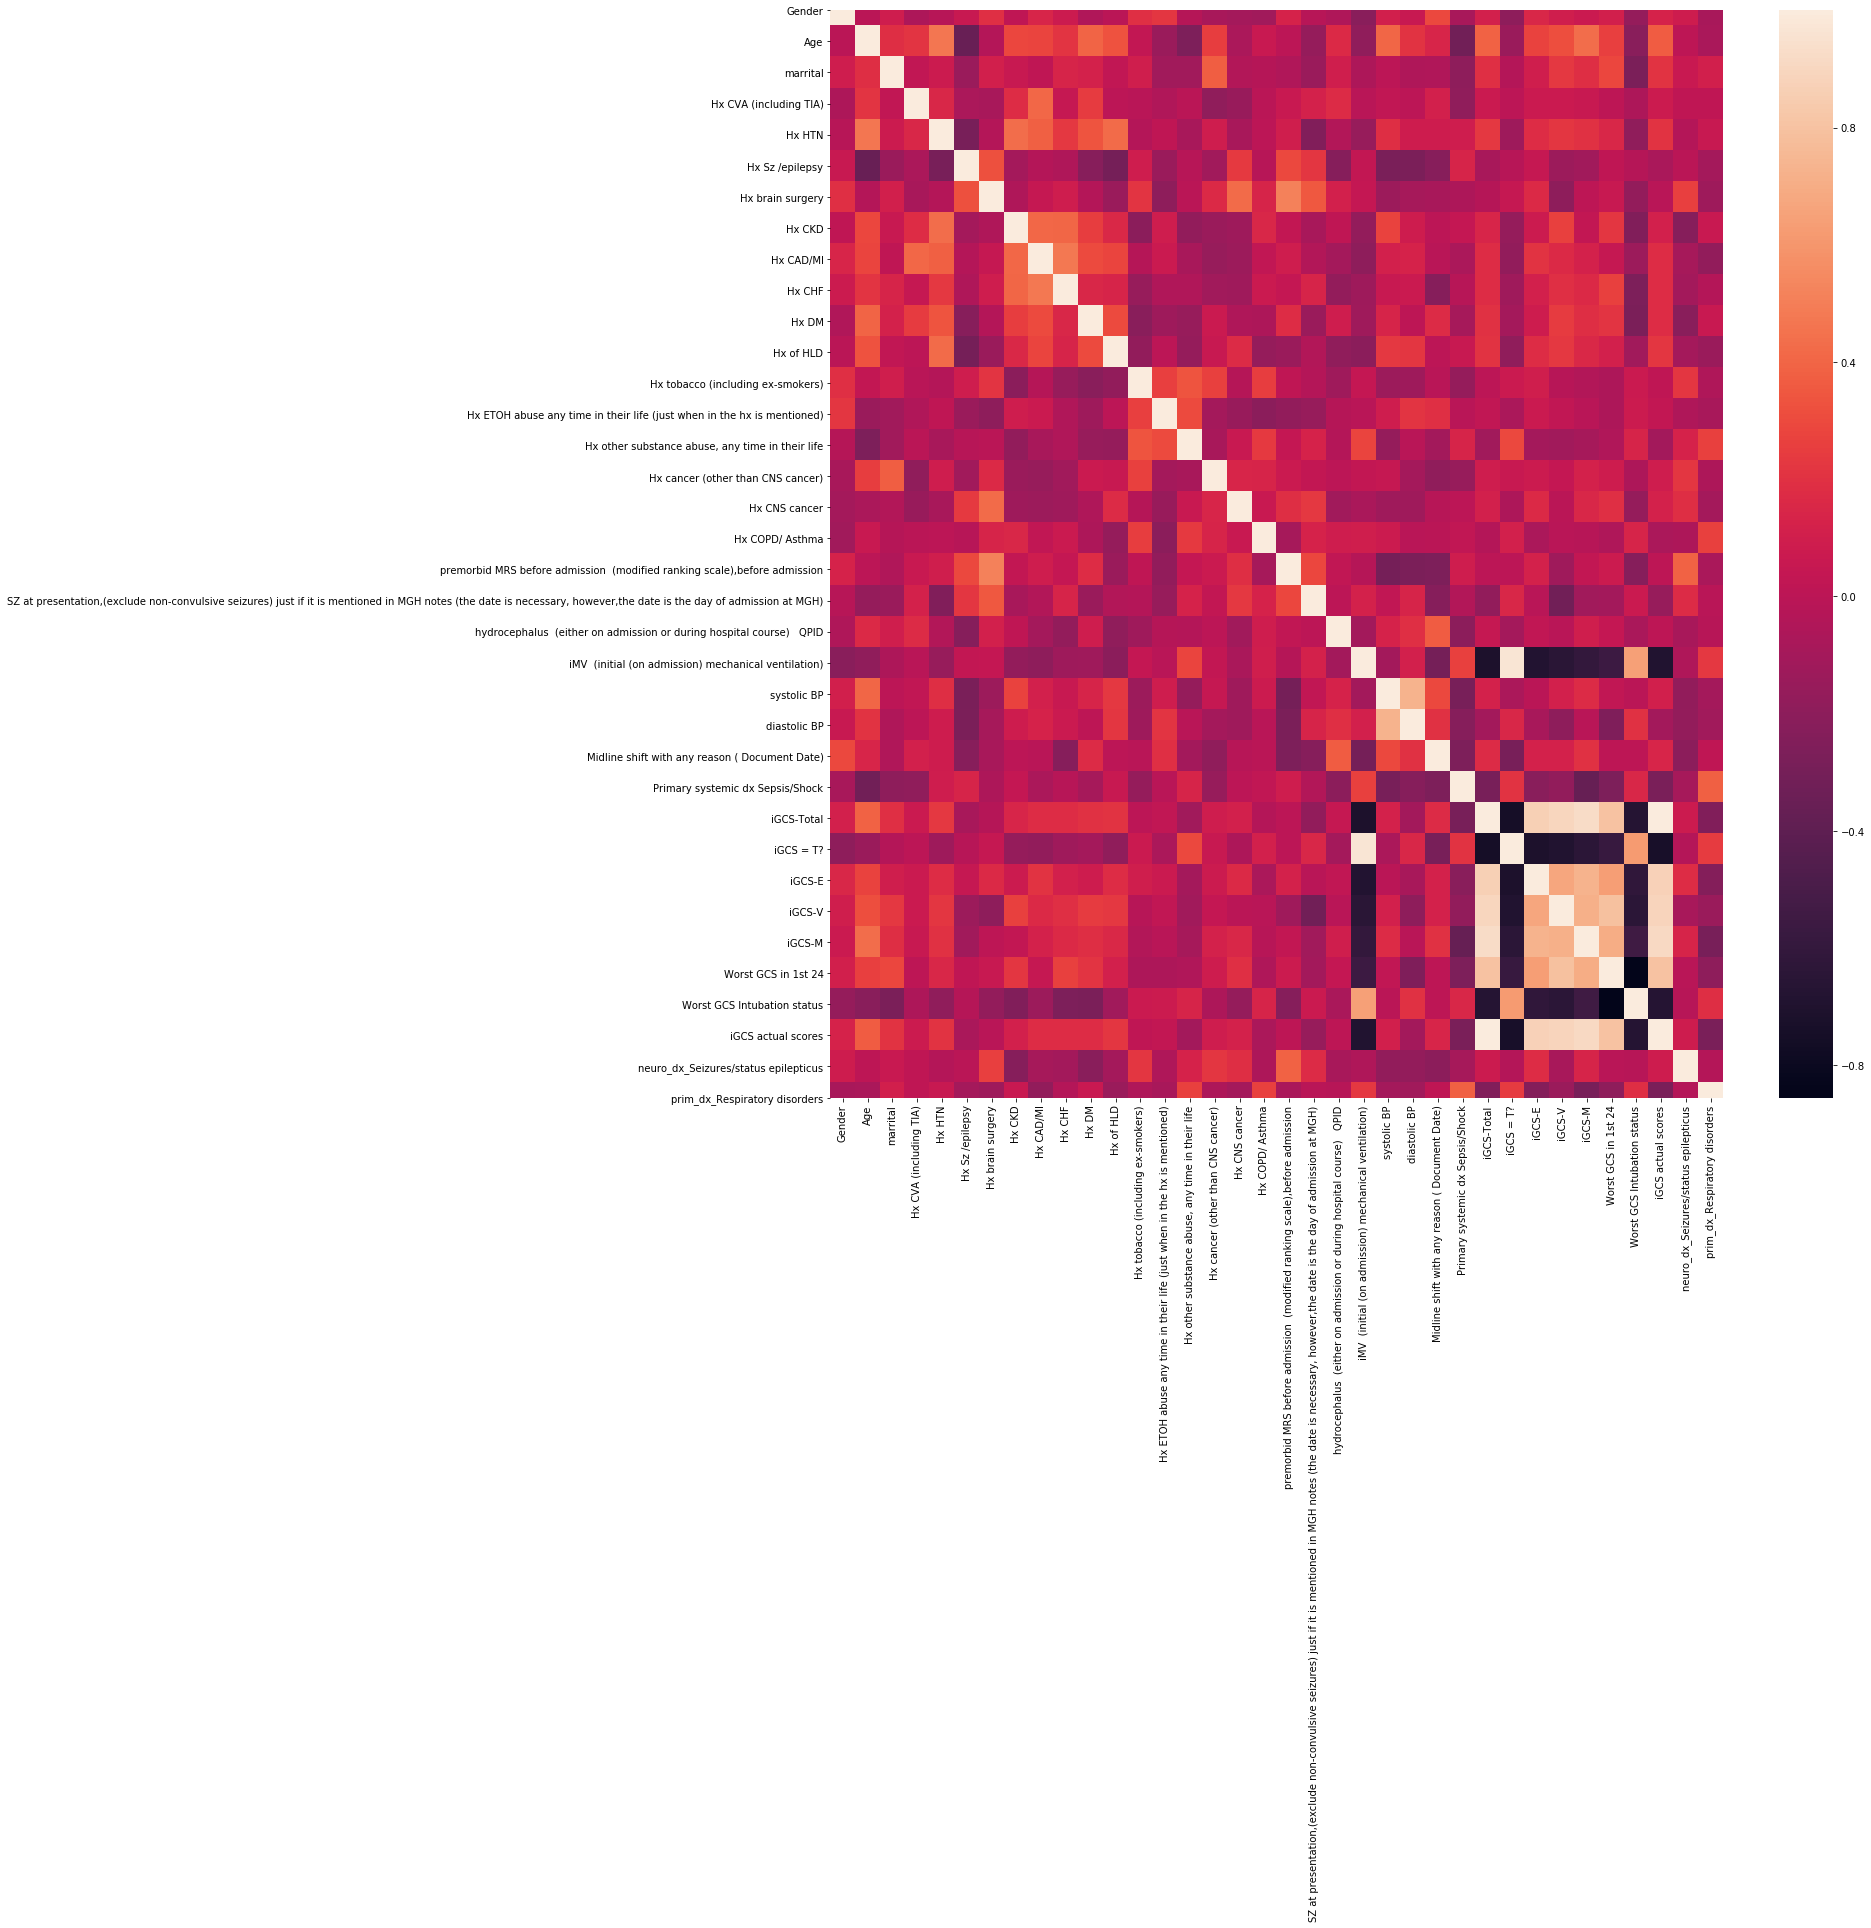

In [7]:
C_correlation = np.corrcoef(X,rowvar=False)
fig = plt.figure(figsize=(20,20))
sns.heatmap(C_correlation)
plt.xticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=90)
plt.yticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=0)
fig.savefig('correlation_c.png')

# Part 2 - Observational Study for Efficacy of Drugs

Let's start with studying the efficacy of Midazolam

### Reading Patients' Data


In [9]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io

data_dir = '/Users/harshparikh/IIC/step1_output/'

In [5]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid36,0,73.84,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,4,1,4,3,1,9,0,0
sid39,0,70.77,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,...,9,0,4,1,4,9,0,9,1,0
sid56,1,82.84,0.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,...,12,0,4,3,5,3,1,12,1,0
sid297,0,58.95,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,...,15,0,4,5,6,15,0,15,0,0
sid327,0,45.47,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,7,1,1,1,5,7,1,7,1,0


In [6]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid36,4,3.0,2.0
sid39,4,3.0,2.0
sid56,5,3.0,2.0
sid297,3,4.0,1.0
sid327,6,1.0,5.0


In [11]:
patients = {}
for sid in sids:
    patients[sid] = {}
    patient = scipy.io.loadmat(data_dir+sid)
    sid_drug = pd.DataFrame(patient['drugs_weightnormalized'],columns=patient['Dnames'])
    sid_iic = (patient['human_iic']!=0.)*(patient['human_iic']!=0)
    
    

In [35]:
np.unique(sid2['human_iic'])[:5]

array([ 0.,  2.,  3., nan, nan])

In [23]:
sid2_iic.shape

(1, 59571)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


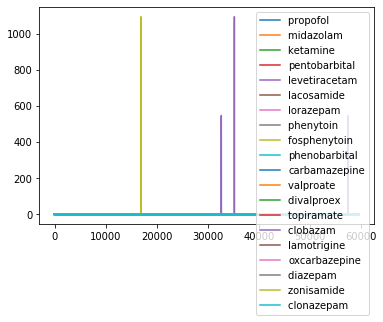

In [28]:
plt.plot(sid2_drug)
plt.legend(sid2['Dnames'])

In [32]:
(np.array([1,2,3]) != (2)) * (np.array([1,2,3]) != (3)) 

array([ True, False, False])